In [10]:
#Imports

import scipy.io
import pandas as pd
import os
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt
from skimage import color
from colormath.color_objects import LabColor
from colormath.color_diff import delta_e_cie2000
import seaborn as sns

ImportError: cannot import name '_version_predates' from 'seaborn.utils' (C:\Users\Carlos\.conda\Nueva carpeta\lib\site-packages\seaborn\utils.py)

In [9]:
!pip uninstall matplotlib seaborn -y
!pip install matplotlib seaborn


Found existing installation: matplotlib 3.9.4
Uninstalling matplotlib-3.9.4:
  Successfully uninstalled matplotlib-3.9.4
Found existing installation: seaborn 0.11.2
Uninstalling seaborn-0.11.2:
  Successfully uninstalled seaborn-0.11.2
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)


In [7]:
#Training view

mat = scipy.io.loadmat("DataSets_ASUS_OLED_GamingDisplay.mat")

training_rgb = pd.DataFrame(mat['TrainingRGB'], columns=['R', 'G', 'B'])
training_xyz = pd.DataFrame(mat['TrainingXYZ'], columns=['X', 'Y', 'Z'])
training_view = pd.concat([training_rgb, training_xyz], axis=1)

print(training_view.head())
print(training_view.describe())

   R  G   B         X         Y         Z
0  0  0   0  0.000000  0.000000  0.000000
1  0  0  12  0.001861  0.000941  0.005407
2  0  0  24  0.205943  0.006292  0.975375
3  0  0  36  0.352295  0.200939  2.794224
4  0  0  48  1.062900  0.493781  5.498844
                 R            G            B             X             Y  \
count  10648.00000  10648.00000  10648.00000  10648.000000  10648.000000   
mean     126.00000    126.00000    126.00000     49.037653     50.051643   
std       76.13504     76.13504     76.13504     28.455074     34.219215   
min        0.00000      0.00000      0.00000      0.000000      0.000000   
25%       60.00000     60.00000     60.00000     26.579440     21.542505   
50%      126.00000    126.00000    126.00000     45.052502     41.923553   
75%      192.00000    192.00000    192.00000     69.273787     75.638421   
max      252.00000    252.00000    252.00000    139.823649    148.288488   

                  Z  
count  10648.000000  
mean      56.166237

In [8]:
#Validation view

validation_rgb = pd.DataFrame(mat['ValidationRGB'], columns=['R', 'G', 'B'])
validation_xyz = pd.DataFrame(mat['ValidationXYZ'], columns=['X', 'Y', 'Z'])

validation_view = pd.concat([validation_rgb, validation_xyz], axis=1)

print(validation_view.head())
print(validation_view.describe())


   R  G   B         X         Y         Z
0  6  6   6  0.000000  0.000000  0.000000
1  6  6  18  0.089853  0.002745  0.425558
2  6  6  30  0.495926  0.332454  1.835895
3  6  6  42  0.907801  0.510769  4.058262
4  6  6  54  1.482858  0.755492  7.141147
                 R            G            B            X            Y  \
count  9261.000000  9261.000000  9261.000000  9261.000000  9261.000000   
mean    126.000000   126.000000   126.000000    47.447305    48.433074   
std      72.667532    72.667532    72.667532    27.163477    32.581070   
min       6.000000     6.000000     6.000000     0.000000     0.000000   
25%      66.000000    66.000000    66.000000    26.236756    21.315441   
50%     126.000000   126.000000   126.000000    43.589008    40.869331   
75%     186.000000   186.000000   186.000000    66.459863    72.912600   
max     246.000000   246.000000   246.000000   136.180084   139.150274   

                 Z  
count  9261.000000  
mean     54.183802  
std      48.093609

In [9]:
#xlsx

training_view.to_excel("training_view.xlsx", index=False)
validation_view.to_excel("validation_view.xlsx", index=False)

print("Minable views exported as 'training_view.xlsx' y 'validation_view.xlsx'")

C:\Users\Carlos\AppData\Local\Temp/ipykernel_2620/2192236703.py:3: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.1' currently installed).
  training_view.to_excel("training_view.xlsx", index=False)
C:\Users\Carlos\AppData\Local\Temp/ipykernel_2620/2192236703.py:4: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.1' currently installed).
  validation_view.to_excel("validation_view.xlsx", index=False)


Minable views exported as 'training_view.xlsx' y 'validation_view.xlsx'


In [10]:
#Model Construction

training_df = pd.read_excel("training_view.xlsx")
validation_df = pd.read_excel("validation_view.xlsx")

X_train = training_df[['R', 'G', 'B']]
y_train = training_df[['X', 'Y', 'Z']]
X_val = validation_df[['R', 'G', 'B']]
y_val = validation_df[['X', 'Y', 'Z']]

tree_x_deep = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_y_deep = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_z_deep = DecisionTreeRegressor(max_depth=10, random_state=42)

tree_x_deep.fit(X_train, y_train['X'])
tree_y_deep.fit(X_train, y_train['Y'])
tree_z_deep.fit(X_train, y_train['Z'])

pred_x_deep = tree_x_deep.predict(X_val)
pred_y_deep = tree_y_deep.predict(X_val)
pred_z_deep = tree_z_deep.predict(X_val)
y_pred_deep = np.stack([pred_x_deep, pred_y_deep, pred_z_deep], axis=1)

mse_x_deep = mean_squared_error(y_val['X'], pred_x_deep)
mse_y_deep = mean_squared_error(y_val['Y'], pred_y_deep)
mse_z_deep = mean_squared_error(y_val['Z'], pred_z_deep)

print(f"MSE X: {mse_x_deep:.2f}")
print(f"MSE Y: {mse_y_deep:.2f}")
print(f"MSE Z: {mse_z_deep:.2f}")


MSE X: 10.31
MSE Y: 11.62
MSE Z: 14.83


=== Reglas para predecir X (modelo profundo) ===
 |--- R <= 162.00
|   |--- G <= 162.00
|   |   |--- R <= 102.00
|   |   |   |--- B <= 162.00
|   |   |   |   |--- G <= 102.00
|   |   |   |   |   |--- B <= 102.00
|   |   |   |   |   |   |--- R <= 66.00
|   |   |   |   |   |   |   |--- G <= 66.00
|   |   |   |   |   |   |   |   |--- B <= 66.00
|   |   |   |   |   |   |   |   |   |--- R <= 42.00
|   |   |   |   |   |   |   |   |   |   |--- G <= 42.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- G >  42.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- R >  42.00
|   |   |   |   |   |   |   |   |   |   |--- R <= 54.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- R >  54.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   

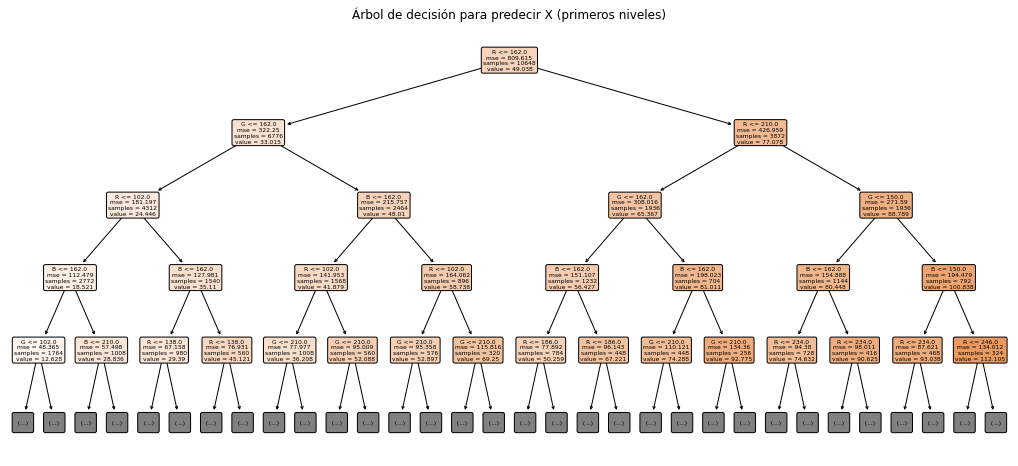

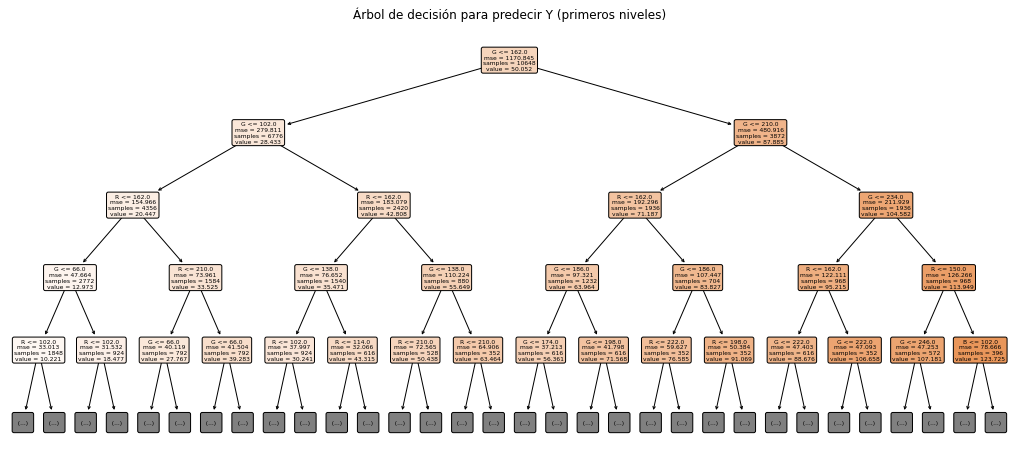

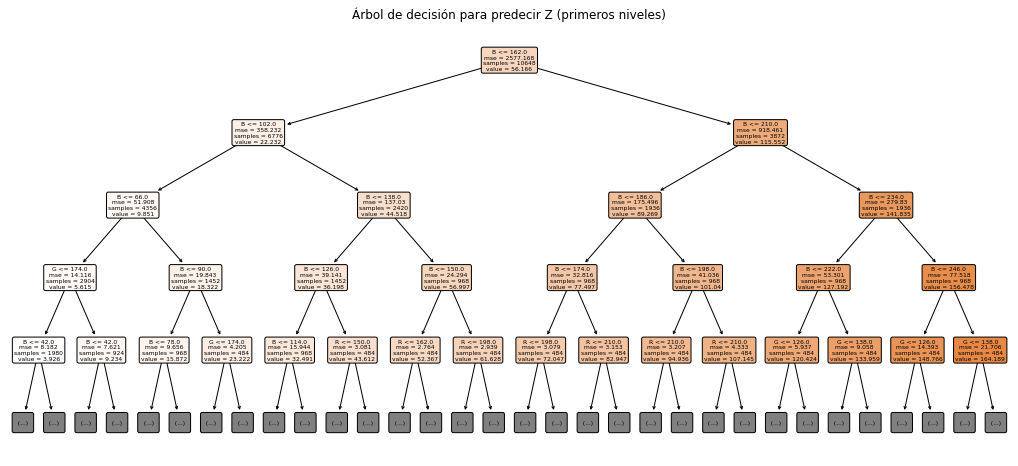

In [11]:
#Rule Extraction and Visualization

reglas_x_deep = export_text(tree_x_deep, feature_names=['R', 'G', 'B'], decimals=2)
reglas_y_deep = export_text(tree_y_deep, feature_names=['R', 'G', 'B'], decimals=2)
reglas_z_deep = export_text(tree_z_deep, feature_names=['R', 'G', 'B'], decimals=2)

print("=== Reglas para predecir X (modelo profundo) ===\n", reglas_x_deep)
print("\n=== Reglas para predecir Y (modelo profundo) ===\n", reglas_y_deep)
print("\n=== Reglas para predecir Z (modelo profundo) ===\n", reglas_z_deep)

plt.figure(figsize=(18, 8))
plot_tree(tree_x_deep, feature_names=['R', 'G', 'B'], filled=True, rounded=True, fontsize=6, max_depth=4)
plt.title("Árbol de decisión para predecir X (primeros niveles)")
plt.show()

plt.figure(figsize=(18, 8))
plot_tree(tree_y_deep, feature_names=['R', 'G', 'B'], filled=True, rounded=True, fontsize=6, max_depth=4)
plt.title("Árbol de decisión para predecir Y (primeros niveles)")
plt.show()

plt.figure(figsize=(18, 8))
plot_tree(tree_z_deep, feature_names=['R', 'G', 'B'], filled=True, rounded=True, fontsize=6, max_depth=4)
plt.title("Árbol de decisión para predecir Z (primeros niveles)")
plt.show()


In [13]:
#Model Evaluation
import numpy as np
np.asscalar = lambda a: a.item()  # Parche temporal para compatibilidad

lab_true_deep = color.xyz2lab(y_val.to_numpy())
lab_pred_deep = color.xyz2lab(y_pred_deep)

def compute_delta_e00_array(lab_true, lab_pred):
    delta_e = []
    for true, pred in zip(lab_true, lab_pred):
        c1 = LabColor(*true, observer='2', illuminant='d65')
        c2 = LabColor(*pred, observer='2', illuminant='d65')
        delta = delta_e_cie2000(c1, c2)
        delta_e.append(delta)
    return np.array(delta_e)

delta_e00_deep = compute_delta_e00_array(lab_true_deep, lab_pred_deep)

mean_deep = np.mean(delta_e00_deep)
std_deep = np.std(delta_e00_deep)
max_deep = np.max(delta_e00_deep)
perc_deep_over_2 = np.mean(delta_e00_deep > 2) * 100

print(f"Mean ∆E₀₀: {mean_deep:.2f}")
print(f"Std ∆E₀₀: {std_deep:.2f}")
print(f"Max ∆E₀₀: {max_deep:.2f}")
print(f"% of samples with ∆E₀₀ > 2: {perc_deep_over_2:.2f}%")


Mean ∆E₀₀: 2.10
Std ∆E₀₀: 2.21
Max ∆E₀₀: 77.13
% of samples with ∆E₀₀ > 2: 30.17%


In [14]:
#Error Analysis and Interpretation

validation_df_deep_error = validation_df.copy()
validation_df_deep_error["DeltaE00"] = delta_e00_deep

plt.figure(figsize=(10, 4))
sns.scatterplot(data=validation_df_deep_error, x="R", y="DeltaE00", alpha=0.3)
plt.title("∆E₀₀ vs R channel (modelo profundo)")
plt.xlabel("R")
plt.ylabel("∆E₀₀")
plt.show()

plt.figure(figsize=(10, 4))
sns.scatterplot(data=validation_df_deep_error, x="G", y="DeltaE00", alpha=0.3)
plt.title("∆E₀₀ vs G channel (modelo profundo)")
plt.xlabel("G")
plt.ylabel("∆E₀₀")
plt.show()

plt.figure(figsize=(10, 4))
sns.scatterplot(data=validation_df_deep_error, x="B", y="DeltaE00", alpha=0.3)
plt.title("∆E₀₀ vs B channel (modelo profundo)")
plt.xlabel("B")
plt.ylabel("∆E₀₀")
plt.show()

plt.figure(figsize=(7, 6))
heatmap_data = validation_df_deep_error.pivot_table(
    values="DeltaE00", index="G", columns="R", aggfunc="mean"
)

sns.heatmap(heatmap_data, cmap="magma", cbar_kws={'label': '∆E₀₀'})
plt.title("∆E₀₀ en el plano R-G (modelo profundo)")
plt.xlabel("R")
plt.ylabel("G")
plt.tight_layout()
plt.show()



NameError: name 'sns' is not defined

<Figure size 720x288 with 0 Axes>

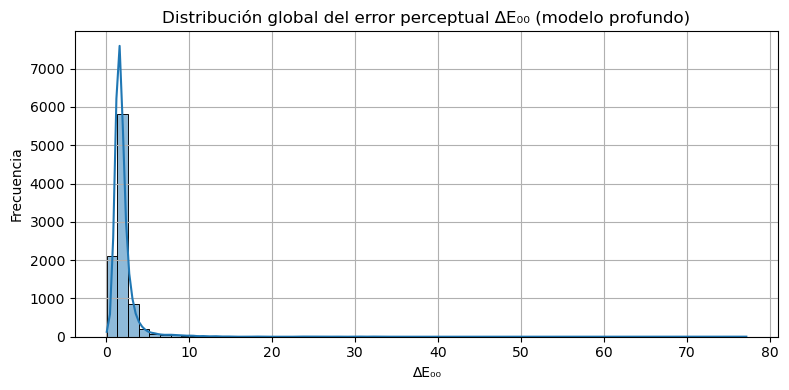

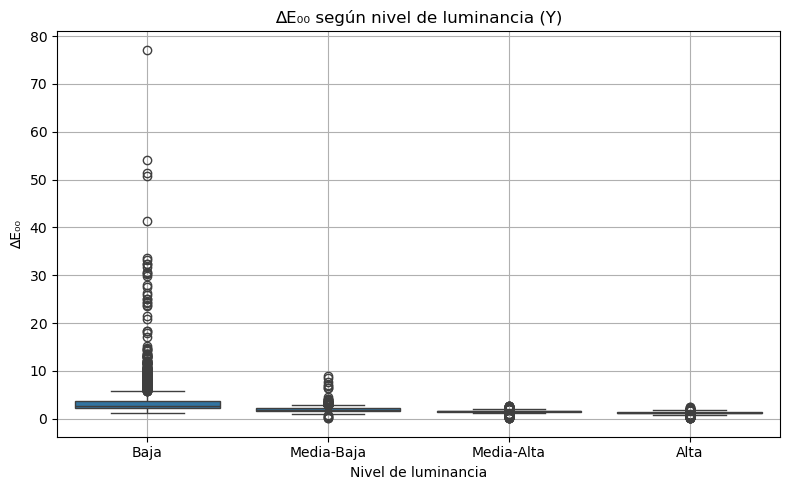

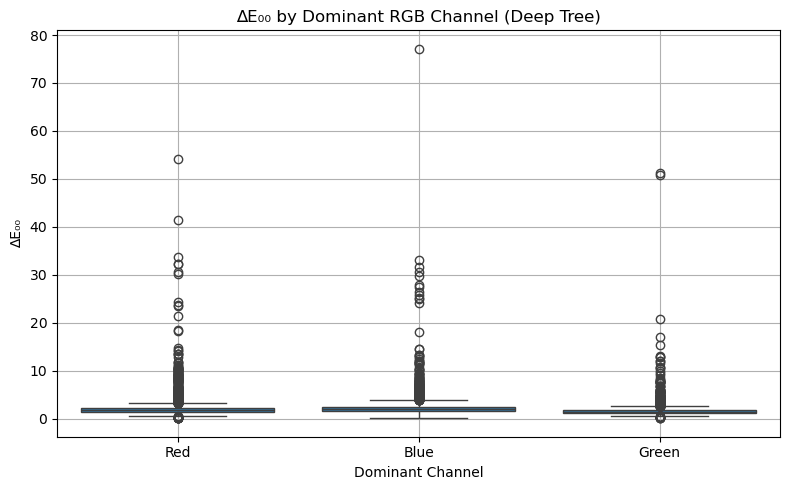

In [9]:
validation_df_deep_error = validation_df.copy()
validation_df_deep_error["DeltaE00"] = delta_e00_deep

plt.figure(figsize=(8, 4))
sns.histplot(validation_df_deep_error["DeltaE00"], bins=60, kde=True)
plt.title("Distribución global del error perceptual ∆E₀₀ (modelo profundo)")
plt.xlabel("∆E₀₀")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

validation_df_deep_error["Y_bin"] = pd.qcut(validation_df_deep_error["Y"], q=4, labels=["Baja", "Media-Baja", "Media-Alta", "Alta"])

plt.figure(figsize=(8, 5))
sns.boxplot(data=validation_df_deep_error, x="Y_bin", y="DeltaE00")
plt.title("∆E₀₀ según nivel de luminancia (Y)")
plt.xlabel("Nivel de luminancia")
plt.ylabel("∆E₀₀")
plt.grid(True)
plt.tight_layout()
plt.show()

def dominante(row):
    max_val = max(row["R"], row["G"], row["B"])
    if row["R"] == max_val:
        return "Red"
    elif row["G"] == max_val:
        return "Green"
    else:
        return "Blue"

validation_df_deep_error["DominantChannel"] = validation_df_deep_error.apply(dominante, axis=1)

plt.figure(figsize=(8, 5))
sns.boxplot(data=validation_df_deep_error, x="DominantChannel", y="DeltaE00")
plt.title("∆E₀₀ by Dominant RGB Channel (Deep Tree)")
plt.xlabel("Dominant Channel")
plt.ylabel("∆E₀₀")
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [5, 8, 10, 12, 15], 'min_samples_leaf': [1, 5, 10]}
best_models = {}

for target in ['X', 'Y', 'Z']:
    grid = GridSearchCV(
        DecisionTreeRegressor(random_state=42),
        params,
        scoring='neg_mean_squared_error',
        cv=3
    )
    grid.fit(X_train, y_train[target])
    best_models[target] = grid.best_estimator_
    print(f"Mejor modelo para {target}: {grid.best_params_}")


Mejor modelo para X: {'max_depth': 15, 'min_samples_leaf': 1}
Mejor modelo para Y: {'max_depth': 15, 'min_samples_leaf': 1}
Mejor modelo para Z: {'max_depth': 15, 'min_samples_leaf': 1}


In [11]:
from sklearn.ensemble import RandomForestRegressor

forest_x = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)
forest_y = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)
forest_z = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)

forest_x.fit(X_train, y_train['X'])
forest_y.fit(X_train, y_train['Y'])
forest_z.fit(X_train, y_train['Z'])

pred_x_forest = forest_x.predict(X_val)
pred_y_forest = forest_y.predict(X_val)
pred_z_forest = forest_z.predict(X_val)
y_pred_forest = np.stack([pred_x_forest, pred_y_forest, pred_z_forest], axis=1)

# Evaluación opcional con ∆E00 también


# Random Forest

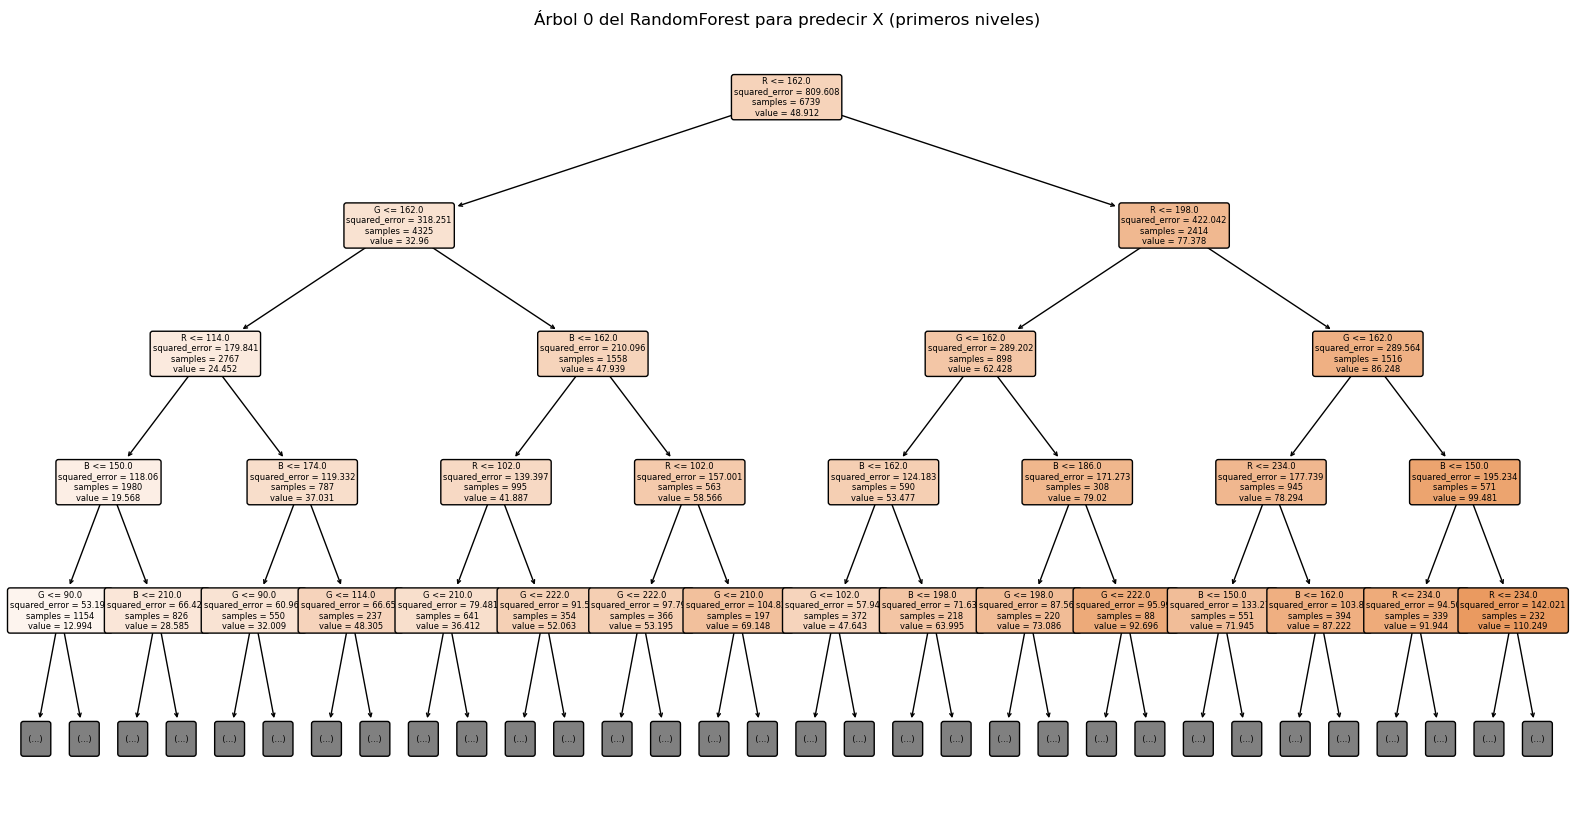

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Mostrar el primer árbol del bosque de X
plt.figure(figsize=(20, 10))
plot_tree(forest_x.estimators_[0], feature_names=['R', 'G', 'B'],
          filled=True, rounded=True, max_depth=4, fontsize=6)
plt.title("Árbol 0 del RandomForest para predecir X (primeros niveles)")
plt.show()


In [13]:
from sklearn.tree import export_text

tree_text = export_text(forest_x.estimators_[0], feature_names=['R', 'G', 'B'], decimals=2)
print("=== Reglas del Árbol 0 del Random Forest (X) ===")
print(tree_text)


=== Reglas del Árbol 0 del Random Forest (X) ===
|--- R <= 162.00
|   |--- G <= 162.00
|   |   |--- R <= 114.00
|   |   |   |--- B <= 150.00
|   |   |   |   |--- G <= 90.00
|   |   |   |   |   |--- R <= 78.00
|   |   |   |   |   |   |--- B <= 102.00
|   |   |   |   |   |   |   |--- R <= 54.00
|   |   |   |   |   |   |   |   |--- B <= 54.00
|   |   |   |   |   |   |   |   |   |--- G <= 54.00
|   |   |   |   |   |   |   |   |   |   |--- value: [1.74]
|   |   |   |   |   |   |   |   |   |--- G >  54.00
|   |   |   |   |   |   |   |   |   |   |--- value: [4.24]
|   |   |   |   |   |   |   |   |--- B >  54.00
|   |   |   |   |   |   |   |   |   |--- G <= 54.00
|   |   |   |   |   |   |   |   |   |   |--- value: [4.42]
|   |   |   |   |   |   |   |   |   |--- G >  54.00
|   |   |   |   |   |   |   |   |   |   |--- value: [6.90]
|   |   |   |   |   |   |   |--- R >  54.00
|   |   |   |   |   |   |   |   |--- G <= 54.00
|   |   |   |   |   |   |   |   |   |--- B <= 54.00
|   |   |   |   |   | 

In [12]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': ['R', 'G', 'B'],
    'Importance_X': forest_x.feature_importances_,
    'Importance_Y': forest_y.feature_importances_,
    'Importance_Z': forest_z.feature_importances_,
})

print(feature_importance)


NameError: name 'forest_x' is not defined

In [15]:
lab_true_forest = color.xyz2lab(y_val.to_numpy())
lab_pred_forest = color.xyz2lab(y_pred_forest)
delta_e00_forest = compute_delta_e00_array(lab_true_forest, lab_pred_forest)

mean_forest = np.mean(delta_e00_forest)
std_forest = np.std(delta_e00_forest)
max_forest = np.max(delta_e00_forest)
perc_forest_over_2 = np.mean(delta_e00_forest > 2) * 100

print(f"Random Forest - Mean ∆E₀₀: {mean_forest:.2f}")
print(f"Random Forest - Std ∆E₀₀: {std_forest:.2f}")
print(f"Random Forest - Max ∆E₀₀: {max_forest:.2f}")
print(f"Random Forest - % of samples with ∆E₀₀ > 2: {perc_forest_over_2:.2f}%")


Random Forest - Mean ∆E₀₀: 3.35
Random Forest - Std ∆E₀₀: 4.93
Random Forest - Max ∆E₀₀: 115.76
Random Forest - % of samples with ∆E₀₀ > 2: 54.26%


# PLS

In [16]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from skimage import color
import numpy as np

# Modelo con 3 componentes latentes (ajustable)
pls_model = PLSRegression(n_components=3)
pls_model.fit(X_train, y_train)

# Predicción sobre el conjunto de validación
y_pred_pls = pls_model.predict(X_val)

# Métricas MSE por canal
mse_x_pls = mean_squared_error(y_val['X'], y_pred_pls[:, 0])
mse_y_pls = mean_squared_error(y_val['Y'], y_pred_pls[:, 1])
mse_z_pls = mean_squared_error(y_val['Z'], y_pred_pls[:, 2])

print(f"PLS MSE X: {mse_x_pls:.2f}")
print(f"PLS MSE Y: {mse_y_pls:.2f}")
print(f"PLS MSE Z: {mse_z_pls:.2f}")


PLS MSE X: 56.59
PLS MSE Y: 82.89
PLS MSE Z: 180.69


In [17]:
lab_true_pls = color.xyz2lab(y_val.to_numpy())
lab_pred_pls = color.xyz2lab(y_pred_pls)

delta_e00_pls = compute_delta_e00_array(lab_true_pls, lab_pred_pls)

print(f"Mean ∆E₀₀ (PLS): {np.mean(delta_e00_pls):.2f}")
print(f"Std ∆E₀₀ (PLS): {np.std(delta_e00_pls):.2f}")
print(f"Max ∆E₀₀ (PLS): {np.max(delta_e00_pls):.2f}")
print(f"% ∆E₀₀ > 2 (PLS): {np.mean(delta_e00_pls > 2) * 100:.2f}%")


Mean ∆E₀₀ (PLS): 23.45
Std ∆E₀₀ (PLS): 31.95
Max ∆E₀₀ (PLS): 268.88
% ∆E₀₀ > 2 (PLS): 99.65%


# Relaciones

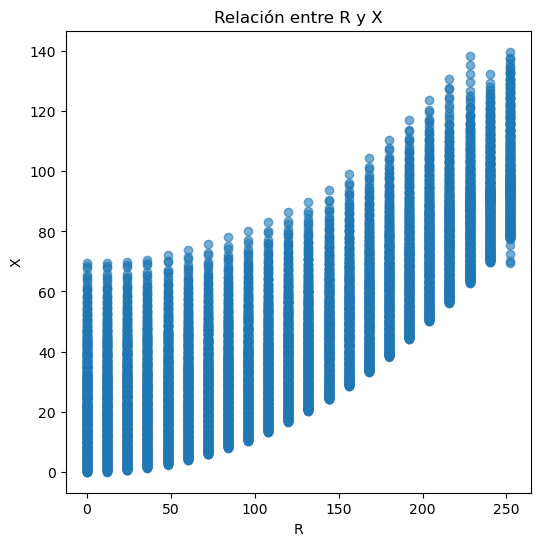

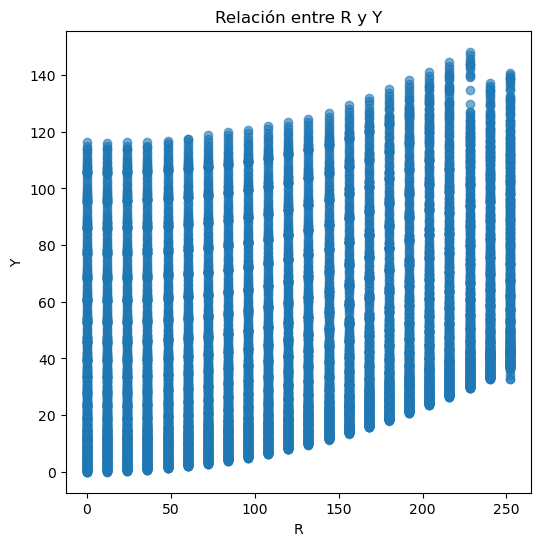

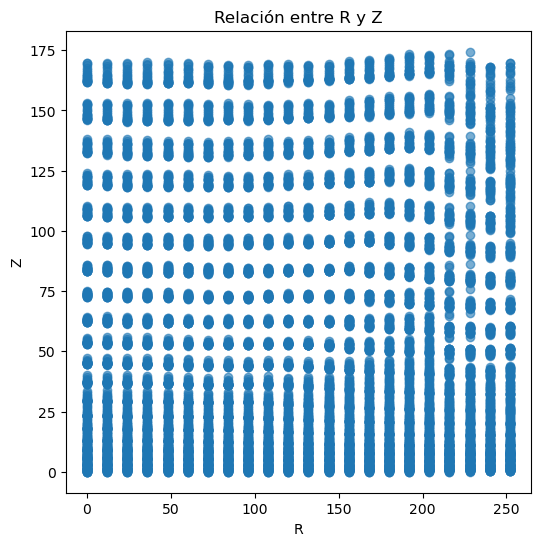

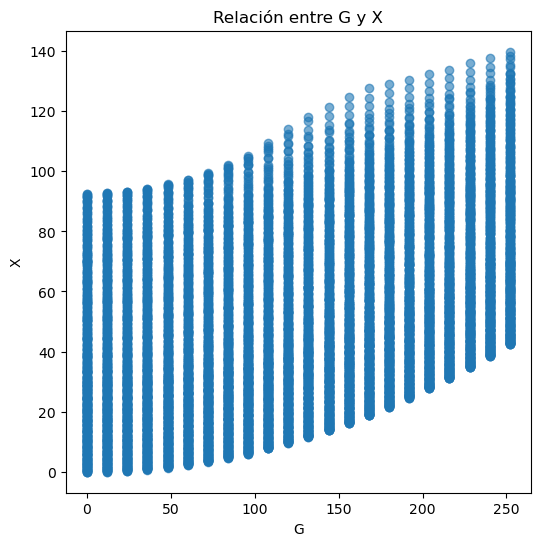

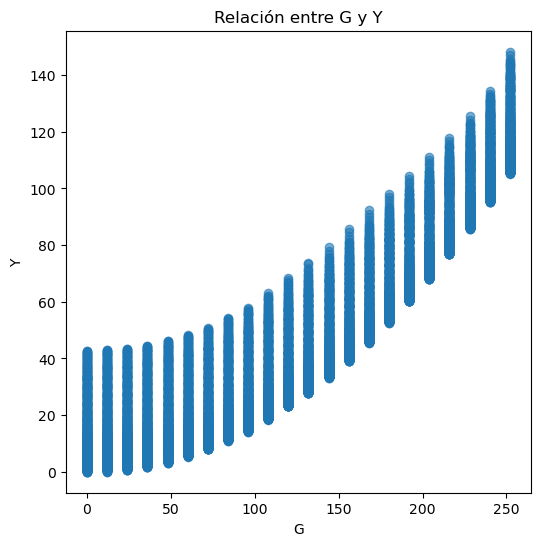

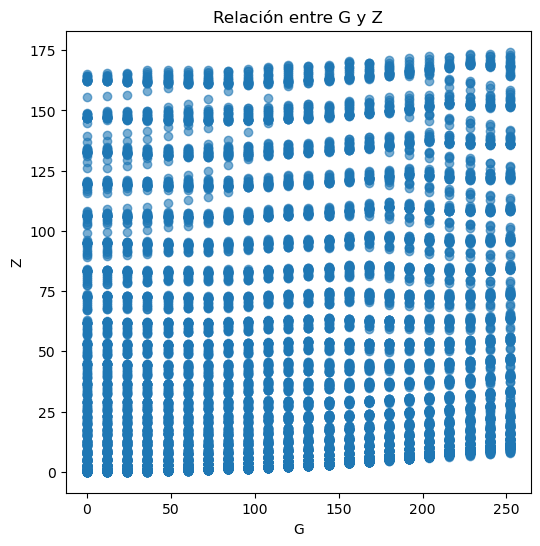

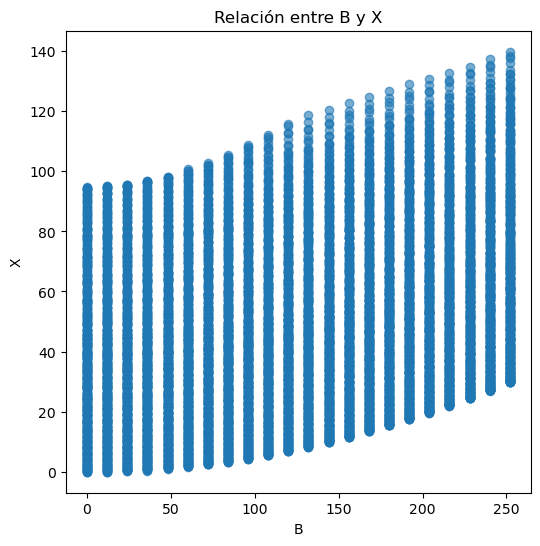

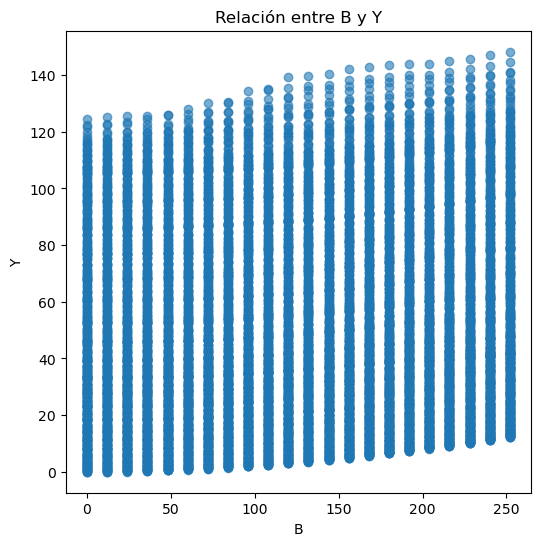

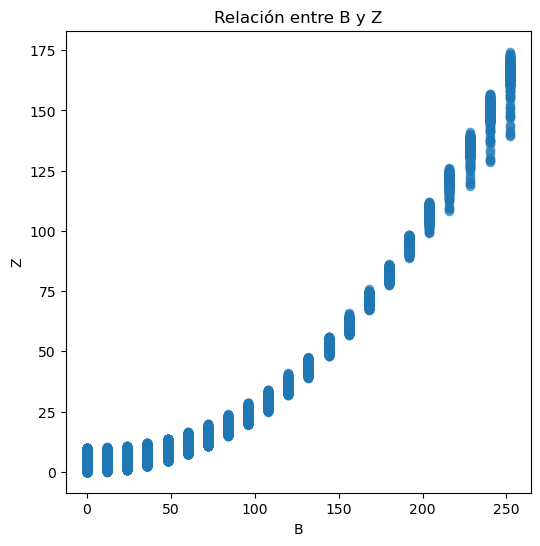

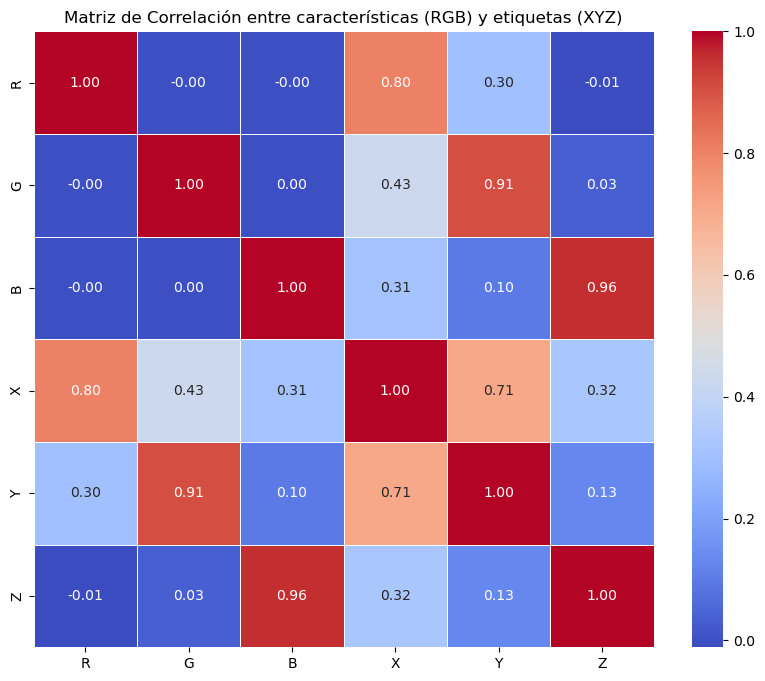

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los datos
training_df = pd.read_excel("training_view.xlsx")
validation_df = pd.read_excel("validation_view.xlsx")

# Función para graficar dispersión entre características y etiquetas
def plot_scatter_matrix(df, features, labels):
    """Genera gráficos de dispersión entre cada par de características y etiquetas"""
    for feature in features:
        for label in labels:
            plt.figure(figsize=(6, 6))
            plt.scatter(df[feature], df[label], alpha=0.6)
            plt.title(f"Relación entre {feature} y {label}")
            plt.xlabel(feature)
            plt.ylabel(label)
            plt.show()

# Características (R, G, B) y etiquetas (X, Y, Z)
features = ['R', 'G', 'B']
labels = ['X', 'Y', 'Z']

# Graficar dispersión para cada combinación de características y etiquetas
plot_scatter_matrix(training_df, features, labels)

# Matriz de correlación entre características y etiquetas
correlation_matrix = training_df[features + labels].corr()

# Graficar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación entre características (RGB) y etiquetas (XYZ)")
plt.show()


C:\Users\pbala\AppData\Local\Temp\ipykernel_13636\770409849.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  luminosity_error = validation_df_deep_error.groupby(luminosity_bins)["DeltaE00"].mean()


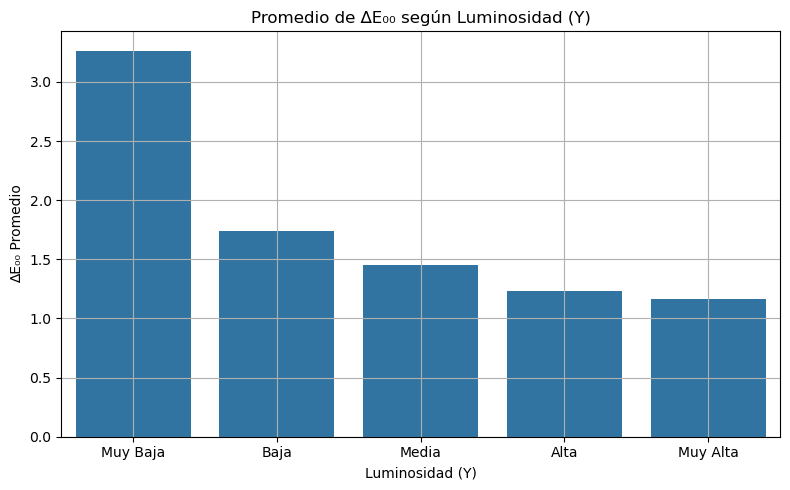

In [19]:
# Agrupar los datos en rangos de luminosidad (Y)
luminosity_bins = pd.cut(validation_df_deep_error["Y"], bins=5, labels=["Muy Baja", "Baja", "Media", "Alta", "Muy Alta"])

# Agregar el DeltaE00 por rango de luminosidad
luminosity_error = validation_df_deep_error.groupby(luminosity_bins)["DeltaE00"].mean()

# Graficar el error perceptual por rango de luminosidad
plt.figure(figsize=(8, 5))
sns.barplot(x=luminosity_error.index, y=luminosity_error.values)
plt.title("Promedio de ∆E₀₀ según Luminosidad (Y)")
plt.xlabel("Luminosidad (Y)")
plt.ylabel("∆E₀₀ Promedio")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# Correlación entre luminosidad y error perceptual
corr_y_error = validation_df_deep_error[["Y", "DeltaE00"]].corr()
print(f"Correlación entre Luminosidad (Y) y ∆E₀₀: {corr_y_error.iloc[0, 1]:.2f}")


Correlación entre Luminosidad (Y) y ∆E₀₀: -0.38


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Añadir la luminosidad (Y de la coordenada XYZ) como una nueva feature
X_train_with_luminance = X_train.copy()
X_train_with_luminance["Y"] = y_train["Y"]  # Luminosidad

X_val_with_luminance = X_val.copy()
X_val_with_luminance["Y"] = y_val["Y"]

# Definir el modelo
forest_luminance = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo para predecir la coordenada X como ejemplo
forest_luminance.fit(X_train_with_luminance, y_train["X"])

# Realizar predicción y evaluar
pred_x_luminance = forest_luminance.predict(X_val_with_luminance)
mse_x_luminance = mean_squared_error(y_val["X"], pred_x_luminance)

print(f"MSE con Luminosidad incluida: {mse_x_luminance:.2f}")


MSE con Luminosidad incluida: 3.62


In [22]:
# Añadir luminosidad como una característica más
X_train_with_luminance = X_train.copy()
X_val_with_luminance = X_val.copy()

# Agregar la columna Y (luminosidad) a X_train y X_val
X_train_with_luminance['Y'] = y_train['Y']
X_val_with_luminance['Y'] = y_val['Y']

# Entrenar los modelos de árbol de decisión con luminosidad incluida
tree_x_deep_with_luminance = DecisionTreeRegressor(max_depth=15, random_state=42)
tree_y_deep_with_luminance = DecisionTreeRegressor(max_depth=15, random_state=42)
tree_z_deep_with_luminance = DecisionTreeRegressor(max_depth=15, random_state=42)

tree_x_deep_with_luminance.fit(X_train_with_luminance, y_train['X'])
tree_y_deep_with_luminance.fit(X_train_with_luminance, y_train['Y'])
tree_z_deep_with_luminance.fit(X_train_with_luminance, y_train['Z'])

# Hacer predicciones
pred_x_deep_with_luminance = tree_x_deep_with_luminance.predict(X_val_with_luminance)
pred_y_deep_with_luminance = tree_y_deep_with_luminance.predict(X_val_with_luminance)
pred_z_deep_with_luminance = tree_z_deep_with_luminance.predict(X_val_with_luminance)

y_pred_deep_with_luminance = np.stack([pred_x_deep_with_luminance, pred_y_deep_with_luminance, pred_z_deep_with_luminance], axis=1)

# Calcular el MSE
mse_x_deep_with_luminance = mean_squared_error(y_val['X'], pred_x_deep_with_luminance)
mse_y_deep_with_luminance = mean_squared_error(y_val['Y'], pred_y_deep_with_luminance)
mse_z_deep_with_luminance = mean_squared_error(y_val['Z'], pred_z_deep_with_luminance)

print(f"MSE X (con Luminosidad): {mse_x_deep_with_luminance:.2f}")
print(f"MSE Y (con Luminosidad): {mse_y_deep_with_luminance:.2f}")
print(f"MSE Z (con Luminosidad): {mse_z_deep_with_luminance:.2f}")


MSE X (con Luminosidad): 6.05
MSE Y (con Luminosidad): 0.00
MSE Z (con Luminosidad): 14.80


# Reglas

In [23]:
for _, row in validation_df.iterrows():
    dominant = max(('R', row['R']), ('G', row['G']), ('B', row['B']), key=lambda x: x[1])[0]
    print(f'(color c{row.name} rgb {int(row["R"])} {int(row["G"])} {int(row["B"])})')
    print(f'(color c{row.name} luminancia {row["Y"]:.2f})')
    print(f'(color c{row.name} dominante {dominant})')


(color c0 rgb 6 6 6)
(color c0 luminancia 0.00)
(color c0 dominante R)
(color c1 rgb 6 6 18)
(color c1 luminancia 0.00)
(color c1 dominante B)
(color c2 rgb 6 6 30)
(color c2 luminancia 0.33)
(color c2 dominante B)
(color c3 rgb 6 6 42)
(color c3 luminancia 0.51)
(color c3 dominante B)
(color c4 rgb 6 6 54)
(color c4 luminancia 0.76)
(color c4 dominante B)
(color c5 rgb 6 6 66)
(color c5 luminancia 1.05)
(color c5 dominante B)
(color c6 rgb 6 6 78)
(color c6 luminancia 1.39)
(color c6 dominante B)
(color c7 rgb 6 6 90)
(color c7 luminancia 1.78)
(color c7 dominante B)
(color c8 rgb 6 6 102)
(color c8 luminancia 2.21)
(color c8 dominante B)
(color c9 rgb 6 6 114)
(color c9 luminancia 2.74)
(color c9 dominante B)
(color c10 rgb 6 6 126)
(color c10 luminancia 3.33)
(color c10 dominante B)
(color c11 rgb 6 6 138)
(color c11 luminancia 3.96)
(color c11 dominante B)
(color c12 rgb 6 6 150)
(color c12 luminancia 4.65)
(color c12 dominante B)
(color c13 rgb 6 6 162)
(color c13 luminancia 5.40)

In [24]:
import clips
import numpy as np
from scipy.io import loadmat
env = clips.Environment()

# Crear hechos RGB como entrada
for idx, row in validation_df.iterrows():
    env.assert_string(f"(color c{idx} rgb {int(row['R'])} {int(row['G'])} {int(row['B'])})")

# Regla para calcular luminancia (Y) normalizada
env.build("""
(defrule calcular-luminancia
  (color ?id rgb ?r ?g ?b)
=>
  (bind ?y (/ (+ (* 0.2126 ?r) (* 0.7152 ?g) (* 0.0722 ?b)) 255.0))
  (assert (color ?id luminancia ?y)))
""")

# Regla para identificar el canal dominante
env.build("""
(defrule canal-dominante
  (color ?id rgb ?r ?g ?b)
=>
  (if (and (>= ?r ?g) (>= ?r ?b)) then
      (assert (color ?id dominante Red))
  else
      (if (>= ?g ?b) then
          (assert (color ?id dominante Green))
      else
          (assert (color ?id dominante Blue))))
)
""")

# Regla para predecir XYZ normalizado


# Ejecutar
env.run()

# Mostrar los hechos generados
for fact in env.facts():
    if fact.template.name == "color":
        print(fact)



(color c0 rgb 6 6 6)
(color c1 rgb 6 6 18)
(color c2 rgb 6 6 30)
(color c3 rgb 6 6 42)
(color c4 rgb 6 6 54)
(color c5 rgb 6 6 66)
(color c6 rgb 6 6 78)
(color c7 rgb 6 6 90)
(color c8 rgb 6 6 102)
(color c9 rgb 6 6 114)
(color c10 rgb 6 6 126)
(color c11 rgb 6 6 138)
(color c12 rgb 6 6 150)
(color c13 rgb 6 6 162)
(color c14 rgb 6 6 174)
(color c15 rgb 6 6 186)
(color c16 rgb 6 6 198)
(color c17 rgb 6 6 210)
(color c18 rgb 6 6 222)
(color c19 rgb 6 6 234)
(color c20 rgb 6 6 246)
(color c21 rgb 6 18 6)
(color c22 rgb 6 18 18)
(color c23 rgb 6 18 30)
(color c24 rgb 6 18 42)
(color c25 rgb 6 18 54)
(color c26 rgb 6 18 66)
(color c27 rgb 6 18 78)
(color c28 rgb 6 18 90)
(color c29 rgb 6 18 102)
(color c30 rgb 6 18 114)
(color c31 rgb 6 18 126)
(color c32 rgb 6 18 138)
(color c33 rgb 6 18 150)
(color c34 rgb 6 18 162)
(color c35 rgb 6 18 174)
(color c36 rgb 6 18 186)
(color c37 rgb 6 18 198)
(color c38 rgb 6 18 210)
(color c39 rgb 6 18 222)
(color c40 rgb 6 18 234)
(color c41 rgb 6 18 246)

In [25]:
env.build("""
(defrule clasificar-brillo-oscuro
  (color ?id luminancia ?y)
  (test (< ?y 0.3))
  =>
  (printout t "Color " ?id " clasificado como de brillo: OSCURO" crlf)
  (assert (color ?id brillo oscuro)))
""")

env.build("""
(defrule clasificar-brillo-medio
  (color ?id luminancia ?y)
  (test (and (>= ?y 0.3) (< ?y 0.7)))
  =>
  (printout t "Color " ?id " clasificado como de brillo: MEDIO" crlf)
  (assert (color ?id brillo medio)))
""")

env.build("""
(defrule clasificar-brillo-claro
  (color ?id luminancia ?y)
  (test (>= ?y 0.7))
  =>
  (printout t "Color " ?id " clasificado como de brillo: CLARO" crlf)
  (assert (color ?id brillo claro)))
""")


In [26]:
env.build("""
(defrule clasificar-temperatura-calido
  (color ?id dominante Red)
  =>
  (printout t "Color " ?id " clasificado como temperatura: CÁLIDO" crlf)
  (assert (color ?id temperatura calido)))
""")

env.build("""
(defrule clasificar-temperatura-neutro
  (color ?id dominante Green)
  =>
  (printout t "Color " ?id " clasificado como temperatura: NEUTRO" crlf)
  (assert (color ?id temperatura neutro)))
""")

env.build("""
(defrule clasificar-temperatura-frio
  (color ?id dominante Blue)
  =>
  (printout t "Color " ?id " clasificado como temperatura: FRÍO" crlf)
  (assert (color ?id temperatura frio)))
""")


In [27]:
for fact in env.facts():
    if fact.template.name == "color":
        print(fact)

(color c0 rgb 6 6 6)
(color c1 rgb 6 6 18)
(color c2 rgb 6 6 30)
(color c3 rgb 6 6 42)
(color c4 rgb 6 6 54)
(color c5 rgb 6 6 66)
(color c6 rgb 6 6 78)
(color c7 rgb 6 6 90)
(color c8 rgb 6 6 102)
(color c9 rgb 6 6 114)
(color c10 rgb 6 6 126)
(color c11 rgb 6 6 138)
(color c12 rgb 6 6 150)
(color c13 rgb 6 6 162)
(color c14 rgb 6 6 174)
(color c15 rgb 6 6 186)
(color c16 rgb 6 6 198)
(color c17 rgb 6 6 210)
(color c18 rgb 6 6 222)
(color c19 rgb 6 6 234)
(color c20 rgb 6 6 246)
(color c21 rgb 6 18 6)
(color c22 rgb 6 18 18)
(color c23 rgb 6 18 30)
(color c24 rgb 6 18 42)
(color c25 rgb 6 18 54)
(color c26 rgb 6 18 66)
(color c27 rgb 6 18 78)
(color c28 rgb 6 18 90)
(color c29 rgb 6 18 102)
(color c30 rgb 6 18 114)
(color c31 rgb 6 18 126)
(color c32 rgb 6 18 138)
(color c33 rgb 6 18 150)
(color c34 rgb 6 18 162)
(color c35 rgb 6 18 174)
(color c36 rgb 6 18 186)
(color c37 rgb 6 18 198)
(color c38 rgb 6 18 210)
(color c39 rgb 6 18 222)
(color c40 rgb 6 18 234)
(color c41 rgb 6 18 246)

In [28]:
env.build("""
(defrule predecir-xyz
  (color ?id rgb ?r ?g ?b)
=>
  (bind ?x (/ (+ (* 0.4124 ?r) (* 0.3576 ?g) (* 0.1805 ?b)) 255))
  (bind ?y (/ (+ (* 0.2126 ?r) (* 0.7152 ?g) (* 0.0722 ?b)) 255))
  (bind ?z (/ (+ (* 0.0193 ?r) (* 0.1192 ?g) (* 0.9505 ?b)) 255))
  (assert (predicted_xyz ?id ?x ?y ?z)))
""")


In [29]:
env.build("""
(defrule calcular-diferencia-visual
   (predicted_xyz ?id ?px ?py ?pz)   ; Predicción de XYZ
   (color ?id real-x ?rx ?ry ?rz)     ; Valores reales de XYZ
=>
   ; Cálculo de la diferencia visual (∆E₀₀)
   (bind ?dL (- ?py ?ry))
   (bind ?da (- ?px ?rx))
   (bind ?db (- ?pz ?rz))
   (bind ?dE (sqrt (+ (* ?dL ?dL) (* ?da ?da) (* ?db ?db))))
   
   ; Mostrar el error visual (∆E₀₀)
   (printout t "Error visual (∆E₀₀) para color " ?id ": " ?dE crlf)
)
""")


In [30]:
# Ejecutar las reglas
env.run()

# Extraer los hechos de error visual
for fact in env.facts():
    if fact.template.name == "error_visual":
        color_id = fact[0]
        delta_e00 = fact[1]
        print(f"Error visual (∆E₀₀) para color {color_id}: {delta_e00:.2f}")


# Matriz conversion

In [39]:
import numpy as np
import pandas as pd
import scipy.io
from sklearn.linear_model import LinearRegression
from math import sqrt

# Cargar los datos desde el archivo .mat
mat = scipy.io.loadmat("DataSets_ASUS_OLED_GamingDisplay.mat")
training_rgb = pd.DataFrame(mat['TrainingRGB'], columns=['R', 'G', 'B'])
training_xyz = pd.DataFrame(mat['TrainingXYZ'], columns=['X', 'Y', 'Z'])

# Normalizar y aplicar corrección gamma
def normalize_and_gamma(rgb_array):
    rgb_array = rgb_array / 255.0
    return np.where(rgb_array <= 0.04045, rgb_array / 12.92, ((rgb_array + 0.055) / 1.055) ** 2.4)

rgb_corrected = normalize_and_gamma(training_rgb.values)

# Aprender matriz de conversión personalizada
reg = LinearRegression(fit_intercept=False)
reg.fit(rgb_corrected, training_xyz.values)
custom_matrix = reg.coef_
print("Matriz personalizada RGB->XYZ:\n", custom_matrix)

# Función de conversión con matriz personalizada
def rgb_to_xyz_custom(rgb, matrix):
    rgb = np.array(rgb) / 255.0
    rgb = np.where(rgb <= 0.04045, rgb / 12.92, ((rgb + 0.055) / 1.055) ** 2.4)
    return np.dot(rgb, matrix.T)

# Función de ∆E en espacio XYZ
def delta_e_xyz(xyz1, xyz2):
    return sqrt(np.sum((np.array(xyz1) - np.array(xyz2))**2))


Matriz personalizada RGB->XYZ:
 [[ 8.07611206e+01  4.35318052e+01  3.18380663e+01]
 [ 3.69307949e+01  1.09319583e+02  1.30284418e+01]
 [-1.04575157e-01  7.91927258e+00  1.70822173e+02]]


In [41]:
# Aplicar la conversión a todos los RGB
converted_xyz = np.array([rgb_to_xyz_custom(rgb, custom_matrix) for rgb in training_rgb.values])

# Añadir resultados al DataFrame
training_view = pd.concat([training_rgb, training_xyz], axis=1)
training_view['X_converted'] = converted_xyz[:, 0]
training_view['Y_converted'] = converted_xyz[:, 1]
training_view['Z_converted'] = converted_xyz[:, 2]

# Calcular ∆E entre XYZ real y XYZ predicho
training_view['delta_e'] = training_view.apply(
    lambda row: delta_e_xyz([row['X'], row['Y'], row['Z']],
                            [row['X_converted'], row['Y_converted'], row['Z_converted']]),
    axis=1
)

# Mostrar resultados
print(training_view.head())
print("\n∆E promedio:", training_view['delta_e'].mean())


   R  G   B         X         Y         Z  X_converted  Y_converted  \
0  0  0   0  0.000000  0.000000  0.000000     0.000000     0.000000   
1  0  0  12  0.001861  0.000941  0.005407     0.117053     0.047899   
2  0  0  24  0.205943  0.006292  0.975375     0.290811     0.119003   
3  0  0  36  0.352295  0.200939  2.794224     0.561686     0.229847   
4  0  0  48  1.062900  0.493781  5.498844     0.941032     0.385079   

   Z_converted   delta_e  
0     0.000000  0.000000  
1     0.628029  0.634927  
2     1.560300  0.601700  
3     3.013637  0.304667  
4     5.048963  0.478603  

∆E promedio: 3.1421676343959595


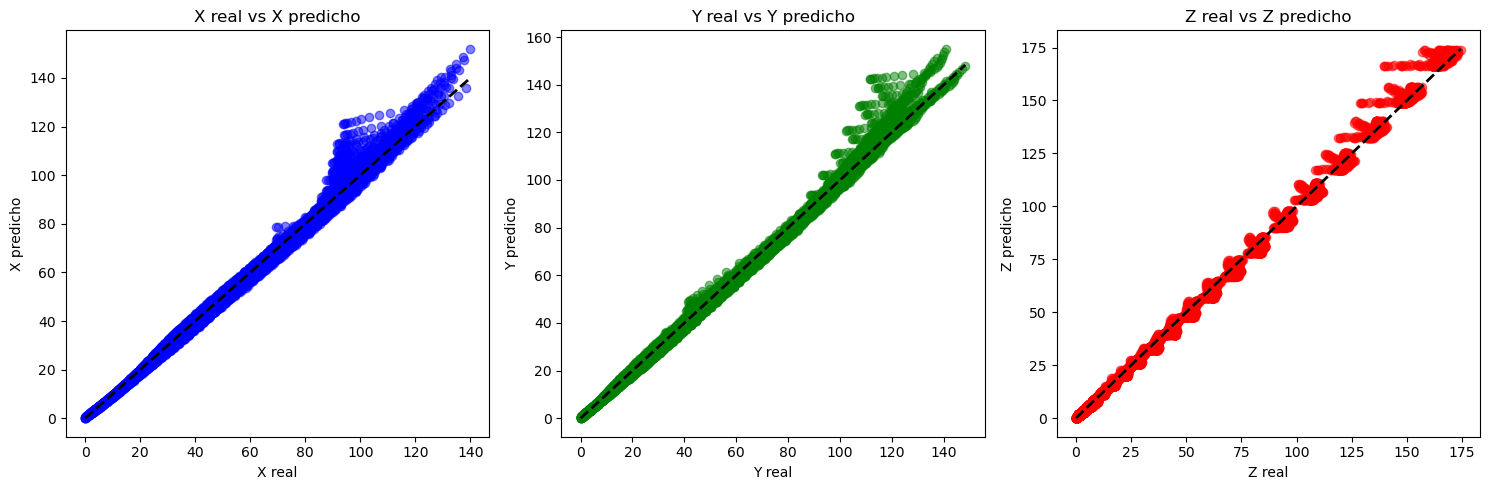

In [43]:
import matplotlib.pyplot as plt

# Graficar XYZ real vs XYZ predicho para cada componente (X, Y, Z)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# X component
axs[0].scatter(training_view['X'], training_view['X_converted'], color='blue', alpha=0.5)
axs[0].plot([min(training_view['X']), max(training_view['X'])], 
            [min(training_view['X']), max(training_view['X'])], 'k--', lw=2)
axs[0].set_title('X real vs X predicho')
axs[0].set_xlabel('X real')
axs[0].set_ylabel('X predicho')

# Y component
axs[1].scatter(training_view['Y'], training_view['Y_converted'], color='green', alpha=0.5)
axs[1].plot([min(training_view['Y']), max(training_view['Y'])], 
            [min(training_view['Y']), max(training_view['Y'])], 'k--', lw=2)
axs[1].set_title('Y real vs Y predicho')
axs[1].set_xlabel('Y real')
axs[1].set_ylabel('Y predicho')

# Z component
axs[2].scatter(training_view['Z'], training_view['Z_converted'], color='red', alpha=0.5)
axs[2].plot([min(training_view['Z']), max(training_view['Z'])], 
            [min(training_view['Z']), max(training_view['Z'])], 'k--', lw=2)
axs[2].set_title('Z real vs Z predicho')
axs[2].set_xlabel('Z real')
axs[2].set_ylabel('Z predicho')

plt.tight_layout()
plt.show()
